#Exploratory data analysis

In [ ]:
import pandas as pd 
import numpy as np
import datetime as dt
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
color = sns.color_palette()
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/dataset/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Project/dataset/test.csv')

##Train dataset

In [ ]:
df.shape

(621300, 136)

In [ ]:
df.head()

,SITE_ID,DATE,CELL_TYPE_Macro,CELL_TYPE_Mobil,CELL_TYPE_TRP,CELL_TYPE_Tx site,CELL_TYPE_micro,N_TRANSPORTED_SITES,GEOGRAPHIC_CLUSTER_K_0,GEOGRAPHIC_CLUSTER_K_1,GEOGRAPHIC_CLUSTER_K_2,GEOGRAPHIC_CLUSTER_K_3,GEOGRAPHIC_CLUSTER_K_4,GEOGRAPHIC_CLUSTER_K_5,GEOGRAPHIC_CLUSTER_K_6,GEOGRAPHIC_CLUSTER_K_7,GEOGRAPHIC_CLUSTER_K_8,GEOGRAPHIC_CLUSTER_K_9,aircon_sum_wo_prev7d,aircon_sum_wo_prev14d,aircon_sum_target_next14d,mean_temperature_prev7d,max_temperature_prev7d,min_temperature_prev7d,mean_temperature_prev3d,max_temperature_prev3d,min_temperature_prev3d,mean_rain_mm_prev7d,max_rain_mm_prev7d,min_rain_mm_prev7d,mean_rain_mm_prev3d,max_rain_mm_prev3d,min_rain_mm_prev3d,mean_humidity_prev7d,max_humidity_prev7d,min_humidity_prev7d,mean_humidity_prev3d,max_humidity_prev3d,min_humidity_prev3d,mean_wind_speed_prev7d,...,equipment_max_persistance_prev7d,equipment_mean_persistance_prev7d,equipment_min_persistance_prev7d,fire/smoke_max_persistance_prev7d,fire/smoke_mean_persistance_prev7d,fire/smoke_min_persistance_prev7d,ge_max_persistance_prev7d,ge_mean_persistance_prev7d,ge_min_persistance_prev7d,power_max_persistance_prev7d,power_mean_persistance_prev7d,power_min_persistance_prev7d,temperature_max_persistance_prev7d,temperature_mean_persistance_prev7d,temperature_min_persistance_prev7d,equipment_max_persistance_prev3d,equipment_mean_persistance_prev3d,equipment_min_persistance_prev3d,fire/smoke_max_persistance_prev3d,fire/smoke_mean_persistance_prev3d,fire/smoke_min_persistance_prev3d,ge_max_persistance_prev3d,ge_mean_persistance_prev3d,ge_min_persistance_prev3d,power_max_persistance_prev3d,power_mean_persistance_prev3d,power_min_persistance_prev3d,temperature_max_persistance_prev3d,temperature_mean_persistance_prev3d,temperature_min_persistance_prev3d,skew_equipment_alarms_prev14d,skew_fire/smoke_alarms_prev14d,skew_ge_alarms_prev14d,skew_power_alarms_prev14d,skew_temperature_alarms_prev14d,kurt_equipment_alarms_prev14d,kurt_fire/smoke_alarms_prev14d,kurt_ge_alarms_prev14d,kurt_power_alarms_prev14d,kurt_temperature_alarms_prev14d
0,146,2019-04-10,1,0,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,10.29,14.0,6.0,12.00,14.0,9.0,1.33,8.5,0.0,3.10,8.5,0.3,62.71,81.0,45.0,70.67,81.0,58.0,11.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308
1,146,2019-04-11,1,0,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,11.71,16.0,9.0,13.00,16.0,9.0,1.90,8.5,0.0,4.27,8.5,0.3,66.43,81.0,51.0,75.00,81.0,71.0,11.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308
2,146,2019-04-12,1,0,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,11.57,16.0,9.0,13.00,16.0,9.0,4.70,19.6,0.0,7.97,19.6,0.3,71.71,88.0,58.0,77.33,88.0,71.0,11.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308
3,146,2019-04-13,1,0,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,11.29,16.0,8.0,11.00,16.0,8.0,4.77,19.6,0.0,8.03,19.6,0.5,74.29,88.0,58.0,80.33,88.0,71.0,11.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308
4,146,2019-04-14,1,0,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,10.57,16.0,5.0,7.33,9.0,5.0,5.39,19.6,0.3,8.13,19.6,0.5,77.29,88.0,58.0,86.00,88.0,82.0,10.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308


In [ ]:
print('Data type of each column of Dataframe:')
for col in df.columns:
  print('Column', col,'is of type', df[col].dtype)

Data type of each column of Dataframe:
Column SITE_ID is of type int64
Column DATE is of type object
Column CELL_TYPE_Macro is of type int64
Column CELL_TYPE_Mobil is of type int64
Column CELL_TYPE_TRP is of type int64
Column CELL_TYPE_Tx site is of type int64
Column CELL_TYPE_micro is of type int64
Column N_TRANSPORTED_SITES is of type float64
Column GEOGRAPHIC_CLUSTER_K_0 is of type int64
Column GEOGRAPHIC_CLUSTER_K_1 is of type int64
Column GEOGRAPHIC_CLUSTER_K_2 is of type int64
Column GEOGRAPHIC_CLUSTER_K_3 is of type int64
Column GEOGRAPHIC_CLUSTER_K_4 is of type int64
Column GEOGRAPHIC_CLUSTER_K_5 is of type int64
Column GEOGRAPHIC_CLUSTER_K_6 is of type int64
Column GEOGRAPHIC_CLUSTER_K_7 is of type int64
Column GEOGRAPHIC_CLUSTER_K_8 is of type int64
Column GEOGRAPHIC_CLUSTER_K_9 is of type int64
Column aircon_sum_wo_prev7d is of type float64
Column aircon_sum_wo_prev14d is of type float64
Column aircon_sum_target_next14d is of type int64
Column mean_temperature_prev7d is of t

The columns are of type float64 or int64. The only column that is of type object is DATE. We want it as datetime.


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
print('Column DATE is of type', df['DATE'].dtype)

Column DATE is of type datetime64[ns]


We have to check if there are row with null value.

In [ ]:
df[df.isnull().sum(axis=1)==1]

,SITE_ID,DATE,CELL_TYPE_Macro,CELL_TYPE_Mobil,CELL_TYPE_TRP,CELL_TYPE_Tx site,CELL_TYPE_micro,N_TRANSPORTED_SITES,GEOGRAPHIC_CLUSTER_K_0,GEOGRAPHIC_CLUSTER_K_1,GEOGRAPHIC_CLUSTER_K_2,GEOGRAPHIC_CLUSTER_K_3,GEOGRAPHIC_CLUSTER_K_4,GEOGRAPHIC_CLUSTER_K_5,GEOGRAPHIC_CLUSTER_K_6,GEOGRAPHIC_CLUSTER_K_7,GEOGRAPHIC_CLUSTER_K_8,GEOGRAPHIC_CLUSTER_K_9,aircon_sum_wo_prev7d,aircon_sum_wo_prev14d,aircon_sum_target_next14d,mean_temperature_prev7d,max_temperature_prev7d,min_temperature_prev7d,mean_temperature_prev3d,max_temperature_prev3d,min_temperature_prev3d,mean_rain_mm_prev7d,max_rain_mm_prev7d,min_rain_mm_prev7d,mean_rain_mm_prev3d,max_rain_mm_prev3d,min_rain_mm_prev3d,mean_humidity_prev7d,max_humidity_prev7d,min_humidity_prev7d,mean_humidity_prev3d,max_humidity_prev3d,min_humidity_prev3d,mean_wind_speed_prev7d,...,equipment_max_persistance_prev7d,equipment_mean_persistance_prev7d,equipment_min_persistance_prev7d,fire/smoke_max_persistance_prev7d,fire/smoke_mean_persistance_prev7d,fire/smoke_min_persistance_prev7d,ge_max_persistance_prev7d,ge_mean_persistance_prev7d,ge_min_persistance_prev7d,power_max_persistance_prev7d,power_mean_persistance_prev7d,power_min_persistance_prev7d,temperature_max_persistance_prev7d,temperature_mean_persistance_prev7d,temperature_min_persistance_prev7d,equipment_max_persistance_prev3d,equipment_mean_persistance_prev3d,equipment_min_persistance_prev3d,fire/smoke_max_persistance_prev3d,fire/smoke_mean_persistance_prev3d,fire/smoke_min_persistance_prev3d,ge_max_persistance_prev3d,ge_mean_persistance_prev3d,ge_min_persistance_prev3d,power_max_persistance_prev3d,power_mean_persistance_prev3d,power_min_persistance_prev3d,temperature_max_persistance_prev3d,temperature_mean_persistance_prev3d,temperature_min_persistance_prev3d,skew_equipment_alarms_prev14d,skew_fire/smoke_alarms_prev14d,skew_ge_alarms_prev14d,skew_power_alarms_prev14d,skew_temperature_alarms_prev14d,kurt_equipment_alarms_prev14d,kurt_fire/smoke_alarms_prev14d,kurt_ge_alarms_prev14d,kurt_power_alarms_prev14d,kurt_temperature_alarms_prev14d


##Test dataset (TO FINISH)

In [ ]:
df_test.shape

(160200, 135)

In [ ]:
df_test.head()

,SITE_ID,DATE,CELL_TYPE_Macro,CELL_TYPE_Mobil,CELL_TYPE_TRP,CELL_TYPE_Tx site,CELL_TYPE_micro,N_TRANSPORTED_SITES,GEOGRAPHIC_CLUSTER_K_0,GEOGRAPHIC_CLUSTER_K_1,GEOGRAPHIC_CLUSTER_K_2,GEOGRAPHIC_CLUSTER_K_3,GEOGRAPHIC_CLUSTER_K_4,GEOGRAPHIC_CLUSTER_K_5,GEOGRAPHIC_CLUSTER_K_6,GEOGRAPHIC_CLUSTER_K_7,GEOGRAPHIC_CLUSTER_K_8,GEOGRAPHIC_CLUSTER_K_9,aircon_sum_wo_prev7d,aircon_sum_wo_prev14d,mean_temperature_prev7d,max_temperature_prev7d,min_temperature_prev7d,mean_temperature_prev3d,max_temperature_prev3d,min_temperature_prev3d,mean_rain_mm_prev7d,max_rain_mm_prev7d,min_rain_mm_prev7d,mean_rain_mm_prev3d,max_rain_mm_prev3d,min_rain_mm_prev3d,mean_humidity_prev7d,max_humidity_prev7d,min_humidity_prev7d,mean_humidity_prev3d,max_humidity_prev3d,min_humidity_prev3d,mean_wind_speed_prev7d,max_wind_speed_prev7d,...,equipment_max_persistance_prev7d,equipment_mean_persistance_prev7d,equipment_min_persistance_prev7d,fire/smoke_max_persistance_prev7d,fire/smoke_mean_persistance_prev7d,fire/smoke_min_persistance_prev7d,ge_max_persistance_prev7d,ge_mean_persistance_prev7d,ge_min_persistance_prev7d,power_max_persistance_prev7d,power_mean_persistance_prev7d,power_min_persistance_prev7d,temperature_max_persistance_prev7d,temperature_mean_persistance_prev7d,temperature_min_persistance_prev7d,equipment_max_persistance_prev3d,equipment_mean_persistance_prev3d,equipment_min_persistance_prev3d,fire/smoke_max_persistance_prev3d,fire/smoke_mean_persistance_prev3d,fire/smoke_min_persistance_prev3d,ge_max_persistance_prev3d,ge_mean_persistance_prev3d,ge_min_persistance_prev3d,power_max_persistance_prev3d,power_mean_persistance_prev3d,power_min_persistance_prev3d,temperature_max_persistance_prev3d,temperature_mean_persistance_prev3d,temperature_min_persistance_prev3d,skew_equipment_alarms_prev14d,skew_fire/smoke_alarms_prev14d,skew_ge_alarms_prev14d,skew_power_alarms_prev14d,skew_temperature_alarms_prev14d,kurt_equipment_alarms_prev14d,kurt_fire/smoke_alarms_prev14d,kurt_ge_alarms_prev14d,kurt_power_alarms_prev14d,kurt_temperature_alarms_prev14d
0,858,2019-04-10,1,0,0,0,0,10.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,12.00,16.0,9.0,14.00,16.0,11.0,1.33,9.0,0.0,3.03,9.0,0.0,60.14,78.0,44.0,67.00,78.0,56.0,17.14,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.21,-1.212308,-1.21,-1.21
1,858,2019-04-11,1,0,0,0,0,10.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,13.14,17.0,10.0,14.67,17.0,11.0,2.01,9.0,0.0,4.63,9.0,0.1,63.29,78.0,49.0,70.33,78.0,66.0,17.14,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.21,-1.212308,-1.21,-1.21
2,858,2019-04-12,1,0,0,0,0,10.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,13.29,17.0,11.0,14.67,17.0,11.0,5.23,22.5,0.0,9.13,22.5,0.1,69.00,89.0,56.0,74.00,89.0,66.0,17.00,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.21,-1.212308,-1.21,-1.21
3,858,2019-04-13,1,0,0,0,0,10.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,13.00,17.0,9.0,12.33,17.0,9.0,5.31,22.5,0.0,9.30,22.5,0.6,71.71,89.0,56.0,79.33,89.0,66.0,16.43,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.21,-1.212308,-1.21,-1.21
4,858,2019-04-14,1,0,0,0,0,10.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,12.43,17.0,8.0,9.33,11.0,8.0,5.34,22.5,0.0,7.83,22.5,0.4,74.71,89.0,56.0,85.33,89.0,83.0,15.29,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.21,-1.212308,-1.21,-1.21


In [ ]:
# check that the missing column is the target

In [ ]:
#the sites used for the train set and test set are disjointed
print("shared sites: " + str(len(set(pd.unique(df.SITE_ID)).intersection(pd.unique(df_test.SITE_ID)))))

shared sites: 0


##Are there features we can drop ?

We count the number of values in each feature

In [ ]:
df_traintest = pd.concat([df, df_test])
feats_counts = df_traintest.nunique(dropna = False)
print(feats_counts.sort_values()[:20])

CELL_TYPE_TRP                 1
GEOGRAPHIC_CLUSTER_K_8        2
GEOGRAPHIC_CLUSTER_K_9        2
GEOGRAPHIC_CLUSTER_K_7        2
GEOGRAPHIC_CLUSTER_K_6        2
GEOGRAPHIC_CLUSTER_K_5        2
GEOGRAPHIC_CLUSTER_K_4        2
GEOGRAPHIC_CLUSTER_K_3        2
GEOGRAPHIC_CLUSTER_K_1        2
GEOGRAPHIC_CLUSTER_K_2        2
CELL_TYPE_micro               2
CELL_TYPE_Tx site             2
CELL_TYPE_Mobil               2
CELL_TYPE_Macro               2
GEOGRAPHIC_CLUSTER_K_0        2
aircon_sum_target_next14d     3
aircon_sum_wo_prev7d          7
aircon_sum_wo_prev14d         9
ge_min_persistance_prev7d    10
min_wind_speed_f_next14d     18
dtype: int64


Since the feature CELL_TYPE_TRP contain just one value, we may think to drop it.

##Categorical features: CELL_TYPE

We weant to see the distribution of sites in the cell type features

In [ ]:
temp = df[['SITE_ID','CELL_TYPE_Macro', 'CELL_TYPE_Mobil', 'CELL_TYPE_TRP', 'CELL_TYPE_Tx site', 'CELL_TYPE_micro']]
IDs = (temp.groupby('SITE_ID').sum())/300
IDs = IDs.astype(int)
IDs

,CELL_TYPE_Macro,CELL_TYPE_Mobil,CELL_TYPE_TRP,CELL_TYPE_Tx site,CELL_TYPE_micro
SITE_ID,,,,,
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
2600,1,0,0,0,0
2601,1,0,0,0,0
2602,1,0,0,0,0


In [ ]:
values = IDs.sum()
values

CELL_TYPE_Macro      1909
CELL_TYPE_Mobil         2
CELL_TYPE_TRP           0
CELL_TYPE_Tx site      69
CELL_TYPE_micro        76
dtype: int64

[Text(0, 0, 'CELL_TYPE_Macro'),
 Text(0, 0, 'CELL_TYPE_Mobil'),
 Text(0, 0, 'CELL_TYPE_TRP'),
 Text(0, 0, 'CELL_TYPE_Tx site'),
 Text(0, 0, 'CELL_TYPE_micro')]

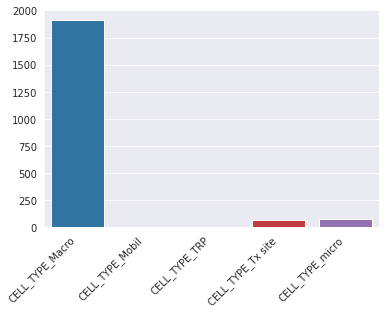

In [ ]:
ax = sns.barplot(x = values.index, y = values);
ax.set_xticklabels(ax.get_xticklabels(), 
                   rotation=45, 
                   horizontalalignment='right')

No sites have cell type TRP: so we can drop the column.

##Categorical features: GEOGRAPHIC_CLUSTER (TO FINISH)

We create a new categorical feature that describe the geographic cluster for each site

In [ ]:
geo_cols = [col for col in df.columns if 'GEOGRAPHIC_CLUSTER_K_' in col]
df_geo=df[geo_cols];

df['cluster_class']=df_geo.idxmax(1)
df.head()

,SITE_ID,DATE,CELL_TYPE_Macro,CELL_TYPE_Mobil,CELL_TYPE_TRP,CELL_TYPE_Tx site,CELL_TYPE_micro,N_TRANSPORTED_SITES,GEOGRAPHIC_CLUSTER_K_0,GEOGRAPHIC_CLUSTER_K_1,GEOGRAPHIC_CLUSTER_K_2,GEOGRAPHIC_CLUSTER_K_3,GEOGRAPHIC_CLUSTER_K_4,GEOGRAPHIC_CLUSTER_K_5,GEOGRAPHIC_CLUSTER_K_6,GEOGRAPHIC_CLUSTER_K_7,GEOGRAPHIC_CLUSTER_K_8,GEOGRAPHIC_CLUSTER_K_9,aircon_sum_wo_prev7d,aircon_sum_wo_prev14d,aircon_sum_target_next14d,mean_temperature_prev7d,max_temperature_prev7d,min_temperature_prev7d,mean_temperature_prev3d,max_temperature_prev3d,min_temperature_prev3d,mean_rain_mm_prev7d,max_rain_mm_prev7d,min_rain_mm_prev7d,mean_rain_mm_prev3d,max_rain_mm_prev3d,min_rain_mm_prev3d,mean_humidity_prev7d,max_humidity_prev7d,min_humidity_prev7d,mean_humidity_prev3d,max_humidity_prev3d,min_humidity_prev3d,mean_wind_speed_prev7d,...,equipment_mean_persistance_prev7d,equipment_min_persistance_prev7d,fire/smoke_max_persistance_prev7d,fire/smoke_mean_persistance_prev7d,fire/smoke_min_persistance_prev7d,ge_max_persistance_prev7d,ge_mean_persistance_prev7d,ge_min_persistance_prev7d,power_max_persistance_prev7d,power_mean_persistance_prev7d,power_min_persistance_prev7d,temperature_max_persistance_prev7d,temperature_mean_persistance_prev7d,temperature_min_persistance_prev7d,equipment_max_persistance_prev3d,equipment_mean_persistance_prev3d,equipment_min_persistance_prev3d,fire/smoke_max_persistance_prev3d,fire/smoke_mean_persistance_prev3d,fire/smoke_min_persistance_prev3d,ge_max_persistance_prev3d,ge_mean_persistance_prev3d,ge_min_persistance_prev3d,power_max_persistance_prev3d,power_mean_persistance_prev3d,power_min_persistance_prev3d,temperature_max_persistance_prev3d,temperature_mean_persistance_prev3d,temperature_min_persistance_prev3d,skew_equipment_alarms_prev14d,skew_fire/smoke_alarms_prev14d,skew_ge_alarms_prev14d,skew_power_alarms_prev14d,skew_temperature_alarms_prev14d,kurt_equipment_alarms_prev14d,kurt_fire/smoke_alarms_prev14d,kurt_ge_alarms_prev14d,kurt_power_alarms_prev14d,kurt_temperature_alarms_prev14d,cluster_class
0,146,2019-04-10,1,0,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,10.29,14.0,6.0,12.00,14.0,9.0,1.33,8.5,0.0,3.10,8.5,0.3,62.71,81.0,45.0,70.67,81.0,58.0,11.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308,GEOGRAPHIC_CLUSTER_K_8
1,146,2019-04-11,1,0,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,11.71,16.0,9.0,13.00,16.0,9.0,1.90,8.5,0.0,4.27,8.5,0.3,66.43,81.0,51.0,75.00,81.0,71.0,11.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308,GEOGRAPHIC_CLUSTER_K_8
2,146,2019-04-12,1,0,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,11.57,16.0,9.0,13.00,16.0,9.0,4.70,19.6,0.0,7.97,19.6,0.3,71.71,88.0,58.0,77.33,88.0,71.0,11.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308,GEOGRAPHIC_CLUSTER_K_8
3,146,2019-04-13,1,0,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,11.29,16.0,8.0,11.00,16.0,8.0,4.77,19.6,0.0,8.03,19.6,0.5,74.29,88.0,58.0,80.33,88.0,71.0,11.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308,GEOGRAPHIC_CLUSTER_K_8
4,146,2019-04-14,1,0,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,10.57,16.0,5.0,7.33,9.0,5.0,5.39,19.6,0.3,8.13,19.6,0.5,77.29,88.0,58.0,86.00,88.0,82.0,10.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308,GEOGRAPHIC_CLUSTER_K_8


#Seasonal pattern of numbers of fault

The idea here is that AC systems failures have some kind of seasonal pattern that we can exploit, to verify it we plot the number of sites with 'aircon_sum_target_next14d' = 1 for every day.

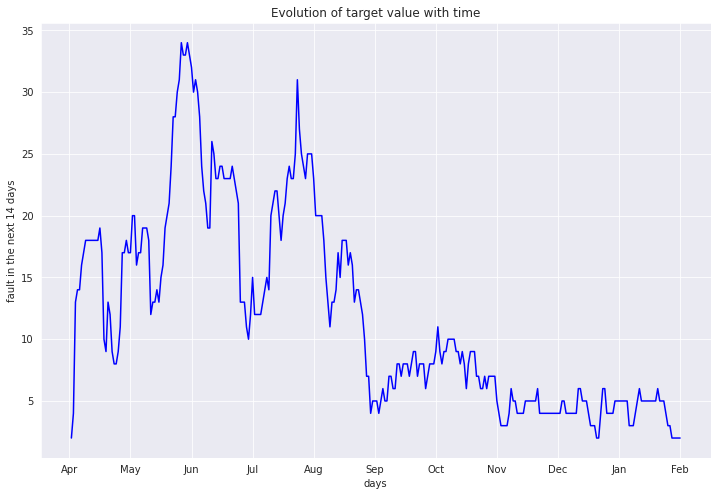

In [ ]:
fault_in_time = df[['DATE', 'aircon_sum_target_next14d']].groupby('DATE').sum()
fault_in_time
X = np.arange(1, fault_in_time.shape[0] + 1)
Y = fault_in_time['aircon_sum_target_next14d']

f, ax1 = plt.subplots(figsize= (12,8), nrows=1)
ax1.set_title('Evolution of target value with time')
ax1.set_xlabel('days')
ax1.set_ylabel('fault in the next 14 days')
plt.xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'])
plt.plot(X, Y, color='Blue');

It is clear that AC faults are unevenly distributed during the year. The period from April to the end of August seems to be the the period when the occurence of faults is higher.

To exploit this feature of course we can't use the target variable, but we can enconde the 'DATE' attribute in a way that help our models. The idea is to create two new ordinal categorical features that encode the days of the month and the month. This will make oour model able to exploit regularities in time and cyclical patterns inside months.

In [ ]:
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day
df['year'] = df['DATE'].dt.year % 2019
df[['year', 'month', 'day']].head(5)

,year,month,day
0,0,4,10
1,0,4,11
2,0,4,12
3,0,4,13
4,0,4,14


#Weather features

##Correlation Analysis

We have 6 features for temperature, rain, humidity and wind in the precedent days and 6 features for forecasting. We want to establish the correlation of these features with themself. The idea is to select the features that can be used to run PCA to reduce dimensionality of the dataset without loosing variance.


In [ ]:
temp_cols = [col for col in df.columns if ('temperature_prev' in col or 'temperature_f' in col)]
rain_cols = [col for col in df.columns if ('rain_mm_prev' in col or 'rain_mm_f' in col)]
hum_cols = [col for col in df.columns if ('humidity_prev' in col or 'humidity_f' in col)]
wind_cols = [col for col in df.columns if ('wind_speed_prev' in col or 'wind_speed_f' in col)]

df_temp=df[temp_cols];
df_rain=df[rain_cols];
df_hum=df[hum_cols];
df_wind=df[wind_cols];

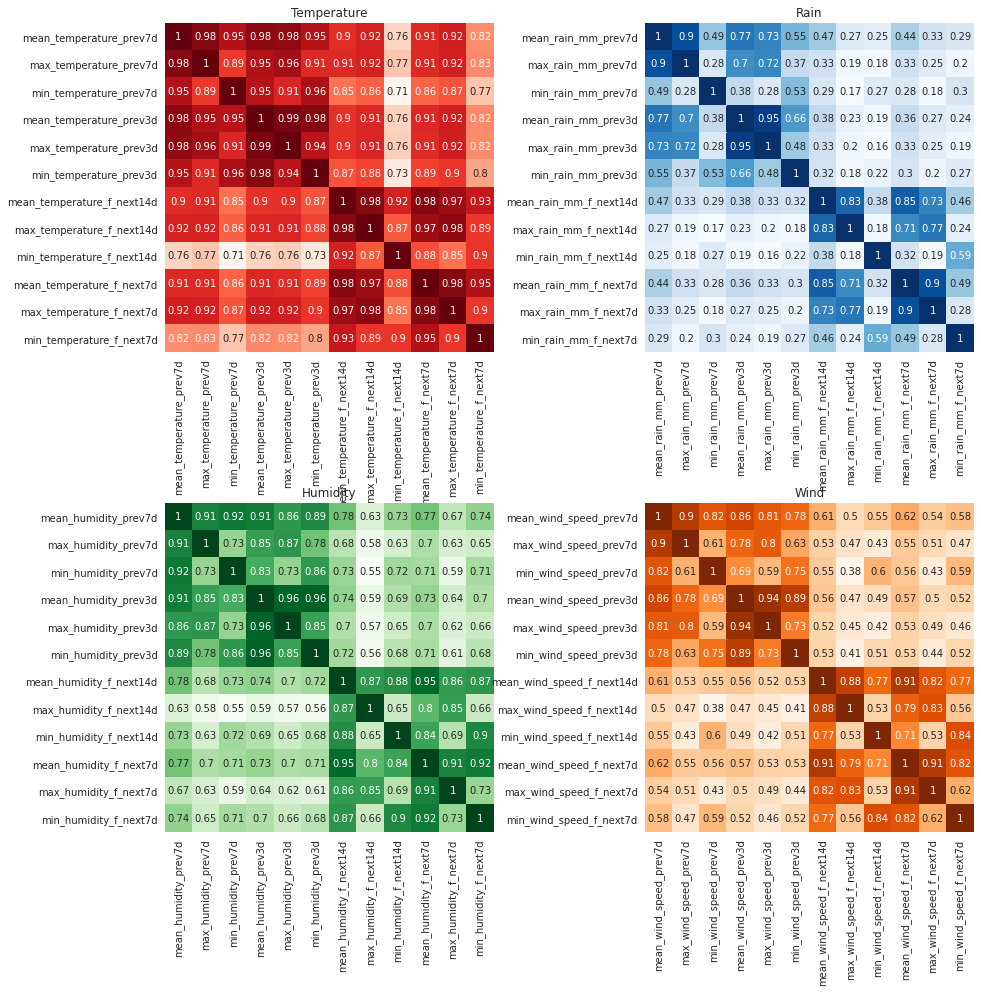

In [ ]:
f, axs = plt.subplots(figsize= (15,15), ncols=2, nrows=2)
f.tight_layout(pad=12)
sns.heatmap(df_temp.corr(), square=True, annot=True, ax=axs[0, 0], cmap="Reds", cbar=False).set(title = 'Temperature');
sns.heatmap(df_rain.corr(), square=True, annot=True, ax=axs[0, 1], cmap='Blues', cbar=False).set(title= 'Rain');
sns.heatmap(df_hum.corr(), square=True, annot=True, ax=axs[1, 0], cmap='Greens', cbar=False).set(title= 'Humidity');
sns.heatmap(df_wind.corr(), square=True, annot=True, ax=axs[1, 1], cmap='Oranges', cbar=False).set(title= 'Wind');

Only temperature seems to have a correlation high for all the features.

##PCA on temperatures

Given the high correlation between temperature features, we decided to apply PCA to reduce the number of feature and extract meaningful features.

First we normalize the data

In [ ]:
normalized_temp = StandardScaler().fit_transform(df_temp)
normalized_temp.shape

(621300, 12)

In [ ]:
pca = PCA(n_components=len(df_temp.columns))
pca.fit(normalized_temp)
PCA_temp = pca.transform(normalized_temp)

Explained variance by 0 components =  90.53104718662736
Explained variance by 1 components =  95.76844510201448
Explained variance by 2 components =  96.99030639580425
Explained variance by 3 components =  98.00208279556692
Explained variance by 4 components =  98.84233409061216
Explained variance by 5 components =  99.3725694649461
Explained variance by 6 components =  99.58730751467995
Explained variance by 7 components =  99.79531098018376
Explained variance by 8 components =  99.90010371805107
Explained variance by 9 components =  99.95180149034756
Explained variance by 10 components =  99.9897743122622
Explained variance by 11 components =  99.99999999999999


Text(0, 0.5, 'Number of components')

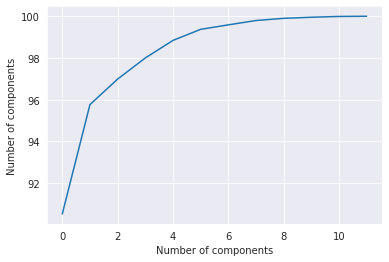

In [ ]:
for i in range(len(pca.explained_variance_ratio_)):
  print('Explained variance by',i,'components = ', np.cumsum(pca.explained_variance_ratio_ *100)[i])

plt.plot(np.cumsum(pca.explained_variance_ratio_ *100))
plt.xlabel('Number of components')
plt.ylabel('Number of components')

##PCA on rain

In [ ]:
normalized_rain = StandardScaler().fit_transform(df_rain)
normalized_rain.shape

(621300, 12)

In [ ]:
pca = PCA(n_components=len(df_rain.columns))
pca.fit(normalized_rain)
PCA_rain = pca.transform(normalized_rain)

Explained variance by 0 components =  46.06409416667755
Explained variance by 1 components =  65.38268291957631
Explained variance by 2 components =  76.60773619108492
Explained variance by 3 components =  83.9319466092668
Explained variance by 4 components =  88.6701936287147
Explained variance by 5 components =  92.21965629412784
Explained variance by 6 components =  95.06585333839055
Explained variance by 7 components =  97.70151944375483
Explained variance by 8 components =  99.06817011910998
Explained variance by 9 components =  99.60411905510638
Explained variance by 10 components =  99.85328599367435
Explained variance by 11 components =  100.0


Text(0, 0.5, 'Number of components')

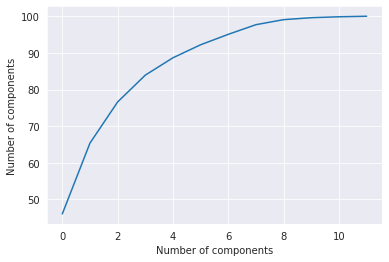

In [ ]:
for i in range(len(pca.explained_variance_ratio_)):
  print('Explained variance by',i,'components = ', np.cumsum(pca.explained_variance_ratio_ *100)[i])

plt.plot(np.cumsum(pca.explained_variance_ratio_ *100))
plt.xlabel('Number of components')
plt.ylabel('Number of components')

##PAC on humidity

In [ ]:
normalized_hum = StandardScaler().fit_transform(df_hum)
normalized_hum.shape

(621300, 12)

In [ ]:
pca = PCA(n_components=len(df_hum.columns))
pca.fit(normalized_hum)
PCA_hum = pca.transform(normalized_hum)

Explained variance by 0 components =  77.15554288147695
Explained variance by 1 components =  87.28923065860795
Explained variance by 2 components =  91.75183113793446
Explained variance by 3 components =  94.30123540935345
Explained variance by 4 components =  96.21843349898933
Explained variance by 5 components =  97.74206522801092
Explained variance by 6 components =  98.56935718898102
Explained variance by 7 components =  99.25964781360845
Explained variance by 8 components =  99.67376348170271
Explained variance by 9 components =  99.8512684652536
Explained variance by 10 components =  99.95745400322544
Explained variance by 11 components =  100.0


Text(0, 0.5, 'Number of components')

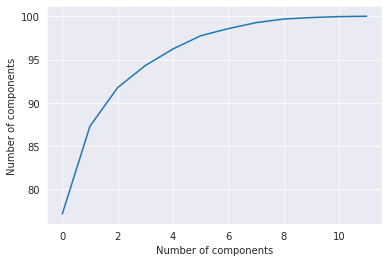

In [ ]:
for i in range(len(pca.explained_variance_ratio_)):
  print('Explained variance by',i,'components = ', np.cumsum(pca.explained_variance_ratio_ *100)[i])

plt.plot(np.cumsum(pca.explained_variance_ratio_ *100))
plt.xlabel('Number of components')
plt.ylabel('Number of components')

##PCA on wind

In [ ]:
normalized_wind = StandardScaler().fit_transform(df_wind)
normalized_wind.shape

(621300, 12)

In [ ]:
pca = PCA(n_components=len(df_wind.columns))
pca.fit(normalized_wind)
PCA_wind= pca.transform(normalized_wind)

Explained variance by 0 components =  65.80672370469784
Explained variance by 1 components =  80.62853129395434
Explained variance by 2 components =  87.72087044860126
Explained variance by 3 components =  91.11766312931056
Explained variance by 4 components =  94.23913432995073
Explained variance by 5 components =  96.41098652324725
Explained variance by 6 components =  97.66290602727244
Explained variance by 7 components =  98.76838344830952
Explained variance by 8 components =  99.37249400399757
Explained variance by 9 components =  99.72698831474152
Explained variance by 10 components =  99.90642671655263
Explained variance by 11 components =  100.00000000000003


Text(0, 0.5, 'Number of components')

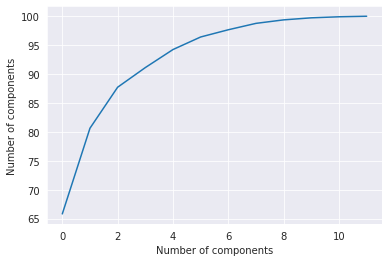

In [ ]:
for i in range(len(pca.explained_variance_ratio_)):
  print('Explained variance by',i,'components = ', np.cumsum(pca.explained_variance_ratio_ *100)[i])

plt.plot(np.cumsum(pca.explained_variance_ratio_ *100))
plt.xlabel('Number of components')
plt.ylabel('Number of components')

#Alarm features

##Correlation Analysis

In [ ]:
#needed to avoid mix with temperature features
df_alarms = df[[col for col in df.columns if '_persistance_' in col or '_alarms_' in col]]

equipment_cols = [col for col in df_alarms.columns if ('equipment_' in col and 'skew' not in col and 'kurt' not in col)]
firesmoke_cols = [col for col in df_alarms.columns if ('fire/smoke_' in col and 'skew' not in col and 'kurt' not in col)]
ge_cols = [col for col in df_alarms.columns if ('ge_' in col and 'skew' not in col and 'kurt' not in col)]
power_cols = [col for col in df_alarms.columns if ('power_' in col and 'skew' not in col and 'kurt' not in col)]
temperature_cols = [col for col in df_alarms.columns if ('temperature_' in col and 'skew' not in col and 'kurt' not in col)]

df_equipment=df[equipment_cols];
df_firesmoke=df[firesmoke_cols];
df_ge=df[ge_cols];
df_power=df[power_cols];
df_temperature=df[temperature_cols];

(0.0, 1.0, 0.0, 1.0)

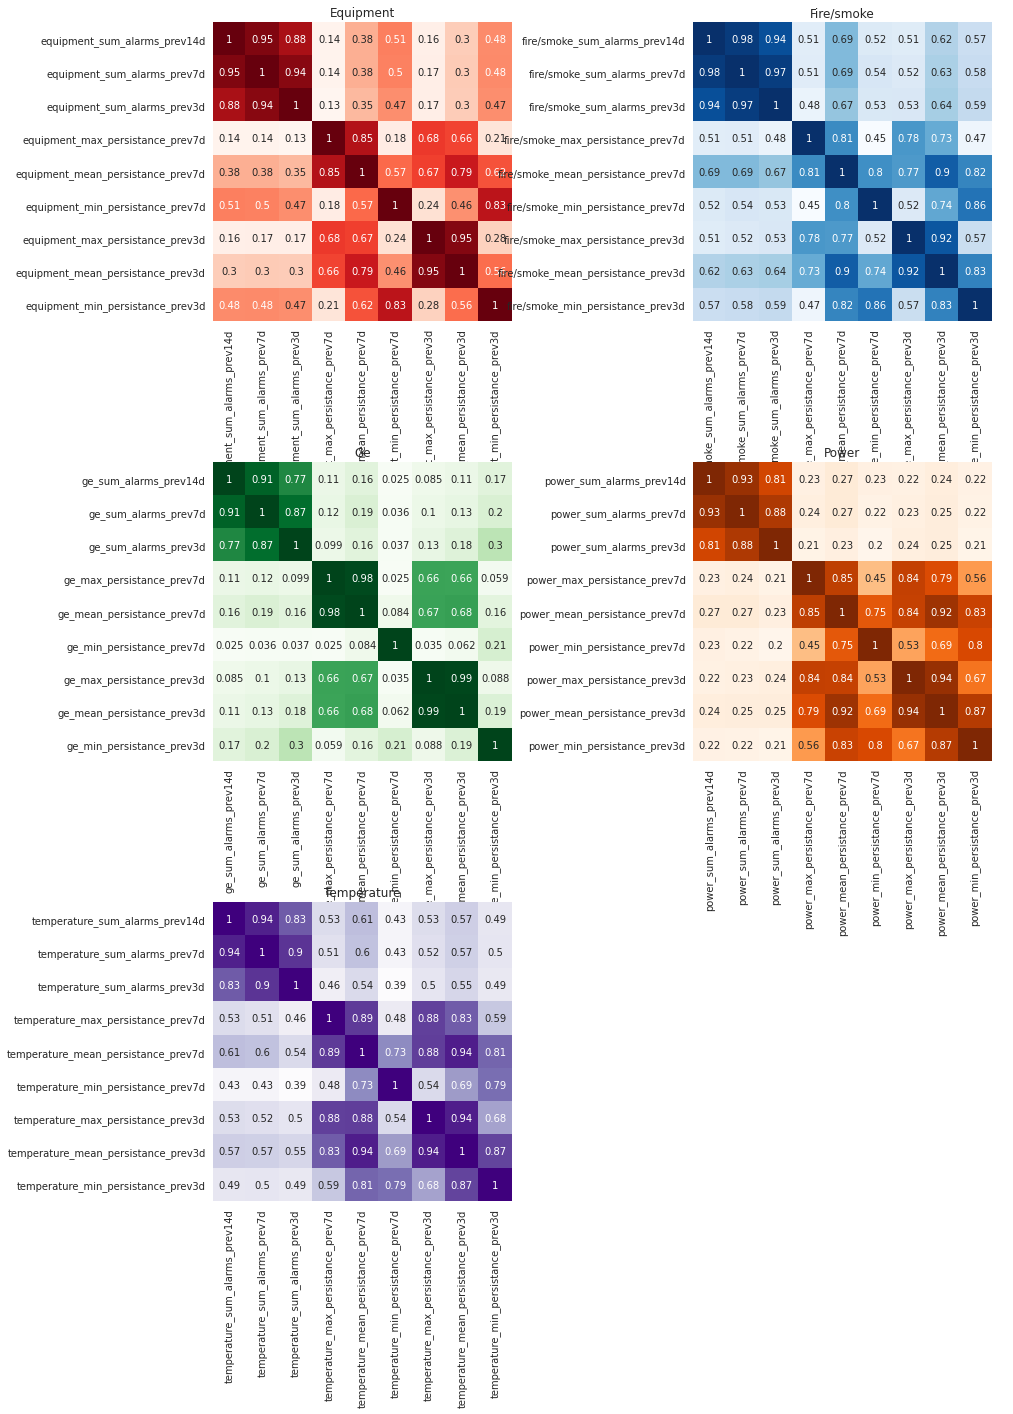

In [ ]:
f, axs = plt.subplots(figsize= (15,20), ncols=2, nrows=3)
f.tight_layout(pad=12)
sns.heatmap(df_equipment.corr(), square=True, annot=True, ax=axs[0, 0], cmap="Reds", cbar=False).set(title = 'Equipment');
sns.heatmap(df_firesmoke.corr(), square=True, annot=True, ax=axs[0, 1], cmap='Blues', cbar=False).set(title= 'Fire/smoke');
sns.heatmap(df_ge.corr(), square=True, annot=True, ax=axs[1, 0], cmap='Greens', cbar=False).set(title= 'Ge');
sns.heatmap(df_power.corr(), square=True, annot=True, ax=axs[1, 1], cmap='Oranges', cbar=False).set(title= 'Power');
sns.heatmap(df_temperature.corr(), square=True, annot=True, ax=axs[2, 0], cmap='Purples', cbar=False).set(title= 'Temperature');
axs[2, 1].axis('off')

In all the 5 categories there is a high correlation between the sum_alarms features.
The persistance features don't seems enough correlated

##Sum_alarm features

Let's concetrate on the sum_alarms features.

In [ ]:
features_ordered = ['equipment_sum_alarms_prev14d','equipment_sum_alarms_prev7d','equipment_sum_alarms_prev3d','fire/smoke_sum_alarms_prev14d','fire/smoke_sum_alarms_prev7d','fire/smoke_sum_alarms_prev3d','ge_sum_alarms_prev14d','ge_sum_alarms_prev7d','ge_sum_alarms_prev3d','power_sum_alarms_prev14d','power_sum_alarms_prev7d','power_sum_alarms_prev3d','temperature_sum_alarms_prev14d','temperature_sum_alarms_prev7d','temperature_sum_alarms_prev3d']
df_sum_alarms = df[features_ordered]

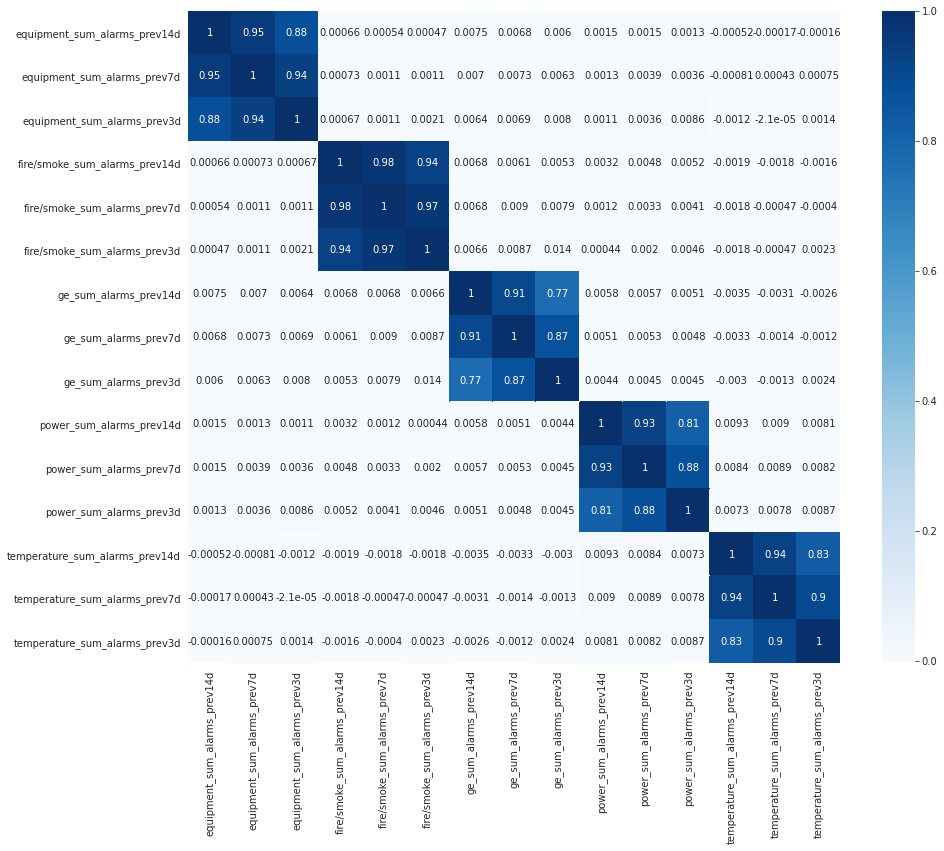

In [ ]:
plt.figure(figsize=(15,12));
sns.heatmap(df_sum_alarms.corr(), square=True, annot=True, cmap='Blues')

The correlation is so high that we will use the PCA

###PCA

In [ ]:
dt_equipment_sumalarms = df_equipment[[col for col in df_equipment.columns if 'alarm' in col]]

normalized = StandardScaler().fit_transform(dt_equipment_sumalarms)

pca = PCA(n_components=len(dt_equipment_sumalarms.columns))
pca.fit(normalized)
PCA_equipment = pca.transform(normalized)

print('PCA for equipment alarms')
for i in range(len(pca.explained_variance_ratio_)):
  print('Explained variance by',i,'components = ', np.cumsum(pca.explained_variance_ratio_ *100)[i])

PCA for equipment alarms
Explained variance by 0 components =  95.00221932603743
Explained variance by 1 components =  99.00781664608411
Explained variance by 2 components =  100.00000000000001


In [ ]:
dt_firesmoke_sumalarms = df_firesmoke[[col for col in df_firesmoke.columns if 'alarm' in col]]

normalized = StandardScaler().fit_transform(dt_firesmoke_sumalarms)

pca = PCA(n_components=len(dt_firesmoke_sumalarms.columns))
pca.fit(normalized)
PCA_firesmoke = pca.transform(normalized)

print('PCA for fire/smoke alarms')
for i in range(len(pca.explained_variance_ratio_)):
  print('Explained variance by',i,'components = ', np.cumsum(pca.explained_variance_ratio_ *100)[i])

PCA for fire/smoke alarms
Explained variance by 0 components =  97.39700021184974
Explained variance by 1 components =  99.56673267338057
Explained variance by 2 components =  99.99999999999997


In [ ]:
dt_ge_sumalarms = df_ge[[col for col in df_ge.columns if 'alarm' in col]]

normalized = StandardScaler().fit_transform(dt_ge_sumalarms)

pca = PCA(n_components=len(dt_ge_sumalarms.columns))
pca.fit(normalized)
PCA_ge = pca.transform(normalized)

print('PCA for ge alarms')
for i in range(len(pca.explained_variance_ratio_)):
  print('Explained variance by',i,'components = ', np.cumsum(pca.explained_variance_ratio_ *100)[i])

PCA for ge alarms
Explained variance by 0 components =  90.07496452681764
Explained variance by 1 components =  97.87534648081515
Explained variance by 2 components =  100.0


In [ ]:
dt_power_sumalarms = df_power[[col for col in df_power.columns if 'alarm' in col]]

normalized = StandardScaler().fit_transform(dt_power_sumalarms)

pca = PCA(n_components=len(dt_power_sumalarms.columns))
pca.fit(normalized)
PCA_power = pca.transform(normalized)

print('PCA for power alarms')
for i in range(len(pca.explained_variance_ratio_)):
  print('Explained variance by',i,'components = ', np.cumsum(pca.explained_variance_ratio_ *100)[i])

PCA for power alarms
Explained variance by 0 components =  91.75668057994446
Explained variance by 1 components =  98.17138839752462
Explained variance by 2 components =  100.0


In [ ]:
dt_temperature_sumalarms = df_temperature[[col for col in df_temperature.columns if 'alarm' in col]]

normalized = StandardScaler().fit_transform(dt_temperature_sumalarms)

pca = PCA(n_components=len(dt_temperature_sumalarms.columns))
pca.fit(normalized)
PCA_temperature = pca.transform(normalized)

print('PCA for temperature alarms')
for i in range(len(pca.explained_variance_ratio_)):
  print('Explained variance by',i,'components = ', np.cumsum(pca.explained_variance_ratio_ *100)[i])

PCA for temperature alarms
Explained variance by 0 components =  92.5735554047562
Explained variance by 1 components =  98.38050847906106
Explained variance by 2 components =  100.00000000000001


#Clustering weather

In [ ]:
df_cluster_date_group = df.groupby(['cluster_class', 'DATE']).mean().reset_index()

[Text(0.5, 1.0, 'mean_temp_prev3d Trend')]

<Figure size 1080x720 with 0 Axes>

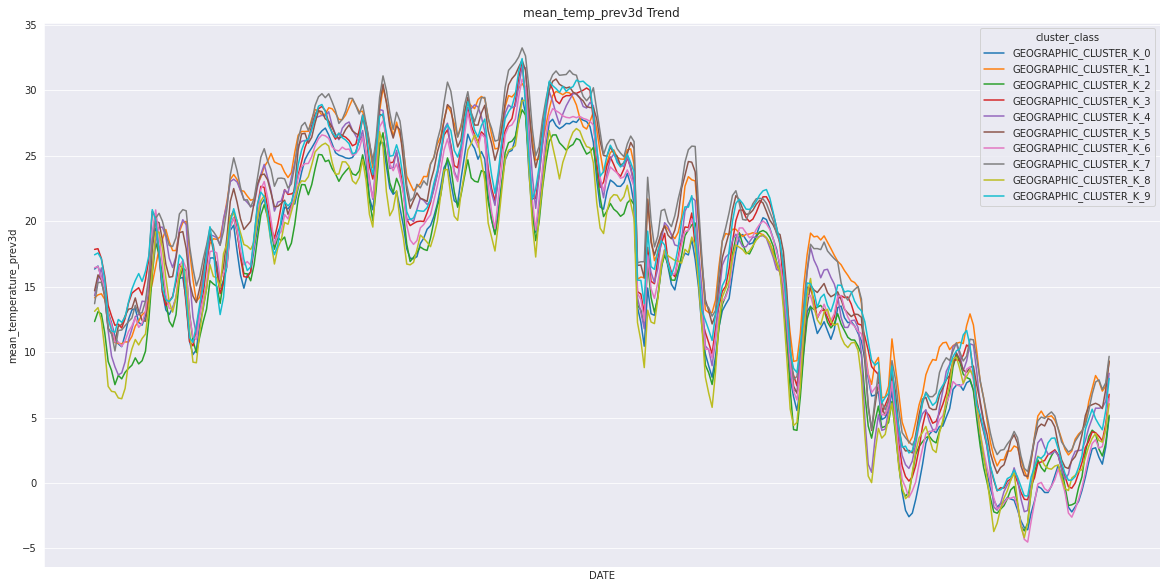

In [ ]:
# plotting the the mean mean_prev3d_temperature for each cluster in the year
plt.figure(figsize=(15,10))
f, ax1 = plt.subplots(figsize= (20,10), nrows=1)
plt.xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'])
sns.lineplot(data=df_cluster_date_group, x='DATE', y='mean_temperature_prev3d', hue='cluster_class').set(title='mean_temp_prev3d Trend')

[Text(0.5, 1.0, 'mean_rain_mm_prev3d Trend')]

<Figure size 1080x720 with 0 Axes>

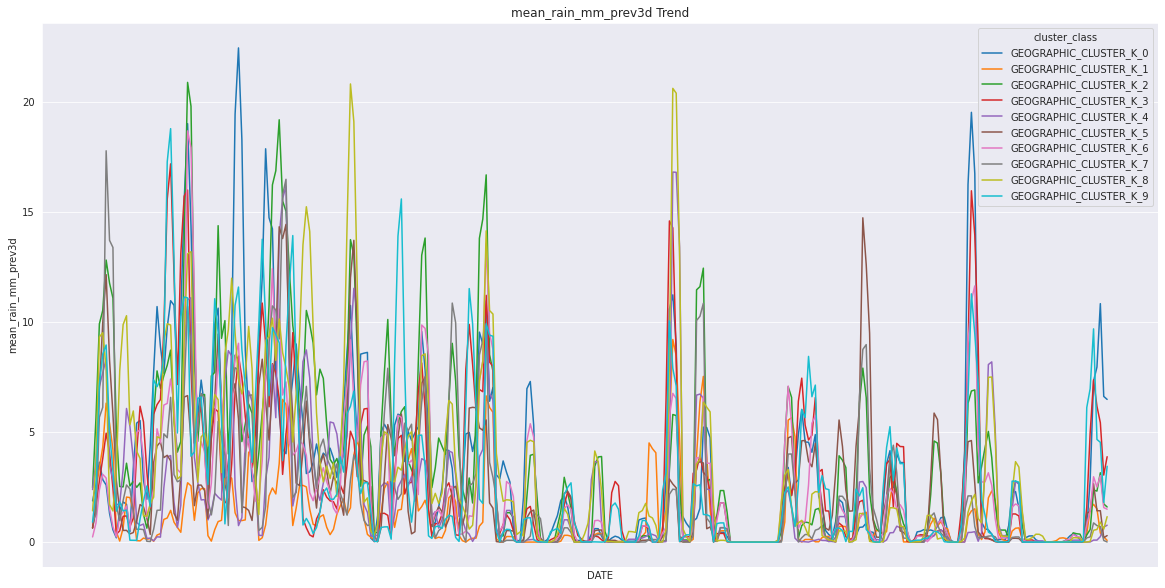

In [ ]:
# plotting the the mean mean_prev3d_temperature for each cluster in the year
plt.figure(figsize=(15,10))
f, ax1 = plt.subplots(figsize= (20,10), nrows=1)
plt.xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'])
sns.lineplot(data=df_cluster_date_group, x='DATE', y='mean_rain_mm_prev3d', hue='cluster_class').set(title='mean_rain_mm_prev3d Trend')

[Text(0.5, 1.0, 'mean_humidity_prev3d Trend')]

<Figure size 1080x720 with 0 Axes>

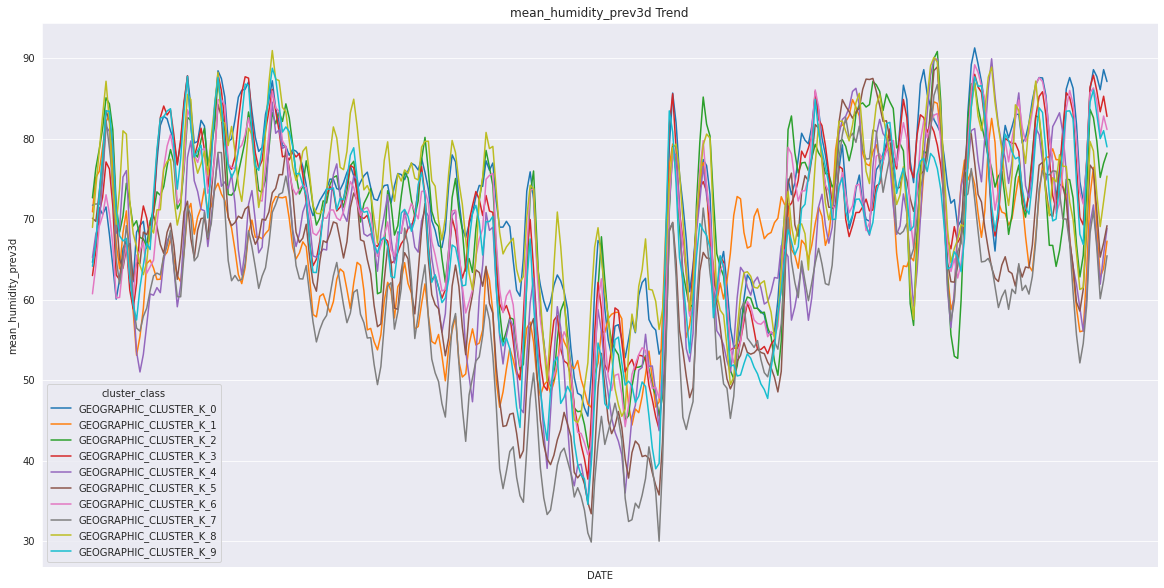

In [ ]:
# plotting the the mean mean_prev3d_temperature for each cluster in the year
plt.figure(figsize=(15,10))
f, ax1 = plt.subplots(figsize= (20,10), nrows=1)
plt.xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'])
sns.lineplot(data=df_cluster_date_group, x='DATE', y='mean_humidity_prev3d', hue='cluster_class').set(title='mean_humidity_prev3d Trend')

#Clustering alarms

<Figure size 648x432 with 0 Axes>

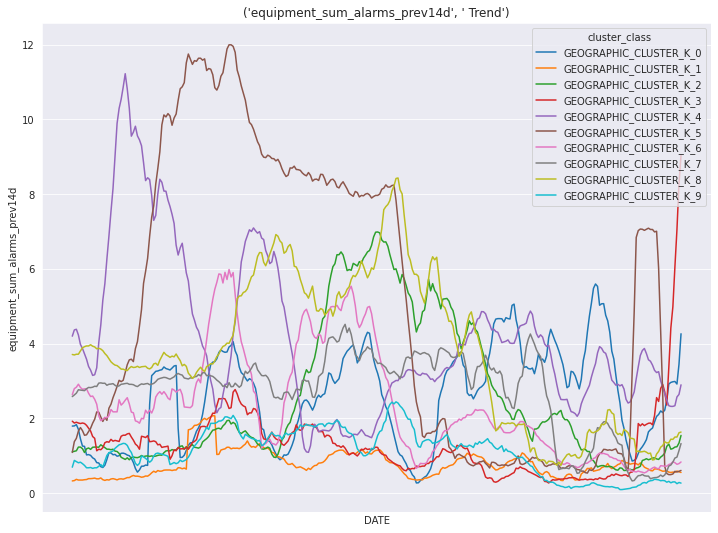

<Figure size 648x432 with 0 Axes>

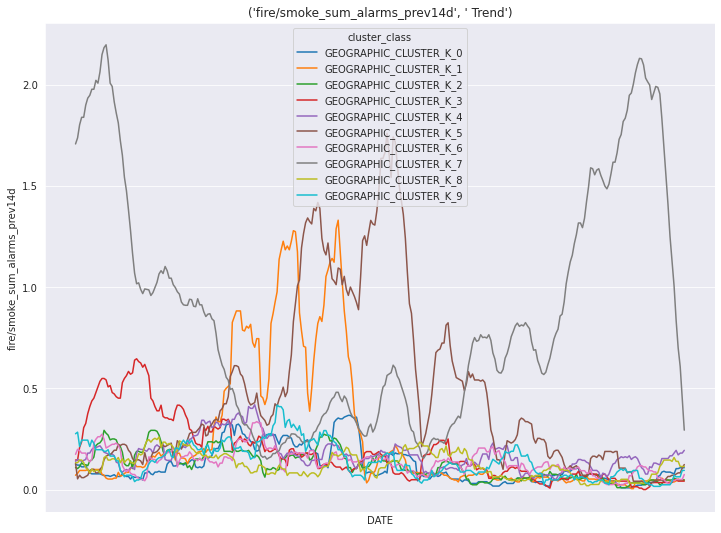

<Figure size 648x432 with 0 Axes>

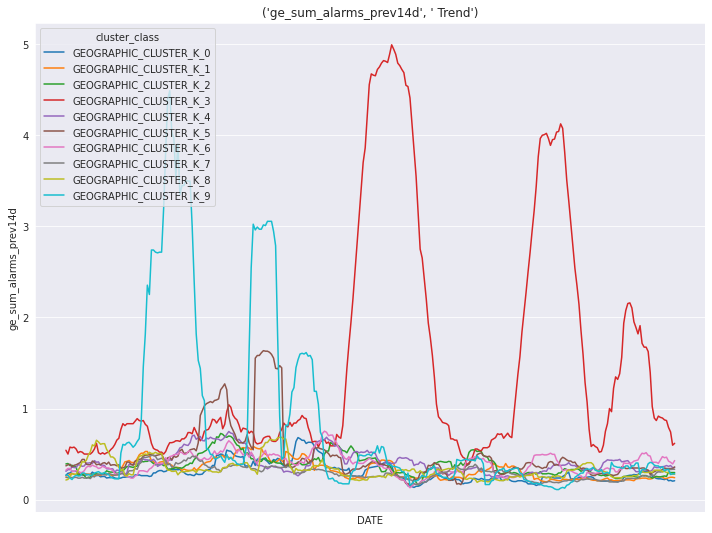

<Figure size 648x432 with 0 Axes>

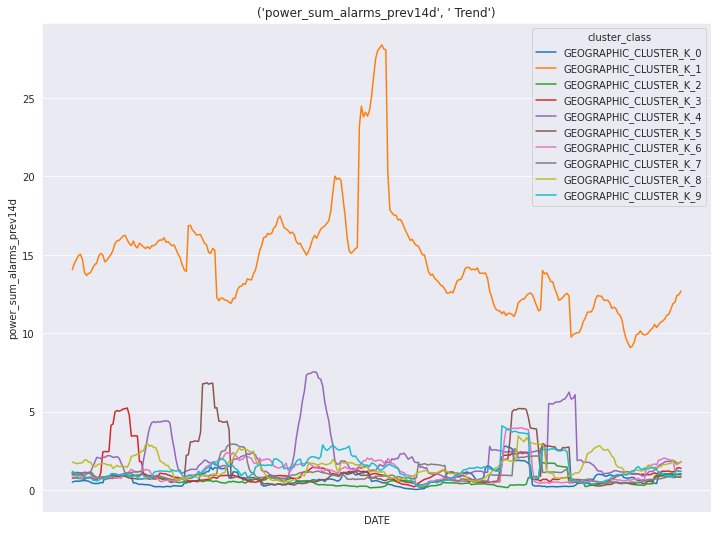

<Figure size 648x432 with 0 Axes>

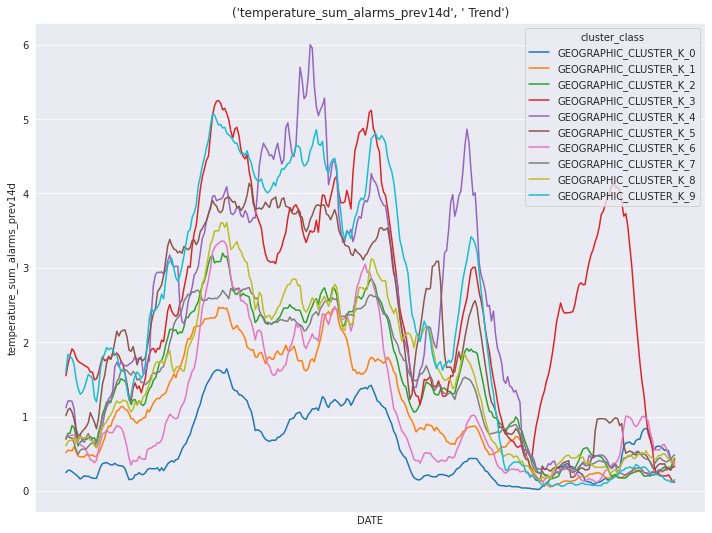

In [ ]:
vars = ['equipment_sum_alarms_prev14d','fire/smoke_sum_alarms_prev14d','ge_sum_alarms_prev14d','power_sum_alarms_prev14d','temperature_sum_alarms_prev14d']

for var in vars:
  plt.figure(figsize=(9,6))
  f, ax1 = plt.subplots(figsize= (12,9), nrows=1);
  plt.xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb']);
  sns.lineplot(data=df_cluster_date_group, x='DATE', y=var, hue='cluster_class').set(title=(var,' Trend'))

#BASELINE MODEL (TO DO)

#MODEL (TO DO)

# Building model 

N:B: 
When use the models remember to drop 'DATE' column. But after the analisys
df = df.drop(columns='DATE')
